In [7]:
import torch, os, glob, pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
from sklearn import preprocessing
from string import punctuation, digits

In [8]:
def findFiles(path): return glob.glob(path)
exclude = punctuation + digits

In [9]:
def char_frequency(corpus):
    with open(corpus) as f:
        text = f.read().lower().replace(' ', '').strip()
    
        df = pd.DataFrame(columns=['Char', 'Act_Freq', 'Rel_Freq', 'Zipf_Freq'])
        frequencies = Counter(filter(lambda x: x not in exclude, text))
        frequencies = frequencies.most_common()
        top_frequency = frequencies[0][1]
        
        for index, item in enumerate(frequencies, start=1):
            relative_freq = "1/{}".format(index)
            zipf_freq = top_frequency * (1/index)
            
            df.loc[index] = [item[0], item[1], relative_freq, zipf_freq]
            
        # Normalize
        # df['Act_Freq'] = preprocessing.minmax_scale(df['Act_Freq'], feature_range=(0.1, 1))
        
    return df


def char_vocabulary(df):
    return {char: freq for char, freq in zip(df['Char'], df['Act_Freq'])}


def plot_char_dist(df):
    plt.figure(figsize=(10, 10))
    plt.ylabel('Zipf Frequency')
    plt.xlabel('Char')
    plt.xticks(rotation=90)
    plt.bar(df['Char'], df['Zipf_Freq'])
    plt.show()

In [10]:
def word_frequency(corpus):
    with open(corpus) as f:
        frequencies = Counter([word.lower().strip(exclude) for line in f for word in line.split() if word.strip(exclude)])
        
        df = pd.DataFrame(columns=['Word', 'Act_Freq', 'Rel_Freq', 'Zipf_Freq'])
        frequencies = frequencies.most_common()
        top_frequency = frequencies[0][1]
        
        for index, item in enumerate(frequencies, start=1):
            relative_freq = "1/{}".format(index)
            zipf_freq = top_frequency * (1/index)
            
            df.loc[index] = [item[0], item[1], relative_freq, zipf_freq]
        
    return df


def word_vocabulary(df):
    return {word: freq for word, freq in zip(df['Word'], df['Act_Freq'])}


def plot_word_dist(df):
    plt.figure(figsize=(10, 10))
    plt.ylabel('Zipf Frequency')
    plt.xlabel('Word')
    plt.xticks(rotation=90)
    x = df.iloc[:20, df.columns.get_loc('Word')]
    y = df.iloc[:20, df.columns.get_loc('Zipf_Freq')]
    plt.bar(x, y)
    plt.show()

In [5]:
languages = ['Dothraki', 'Lojban', 'LdP', 'LFN', 'Esperanto', 'Interlingua', 'Klingon', 'German', 'English', 'Japanese', 'Russian', 'Chinese', 'Hindi', 'Arabic']

In [11]:
de_df = word_frequency('./Data/Natlangs/de_pud-ud-test.txt')
de_words = word_vocabulary(de_df)

In [15]:
print(len(de_words))

6279


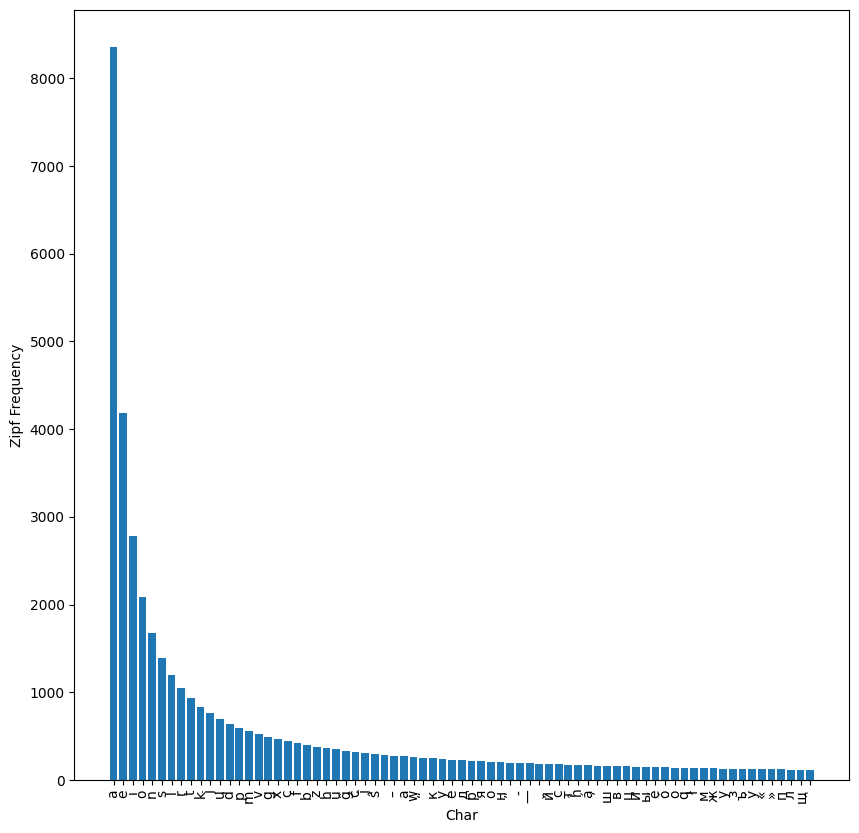

In [6]:
eo_df = char_frequency('./Data/Conlangs/Esperanto.txt')
plot_char_dist(eo_df)

In [ ]:
all_chars = 

In [ ]:
def wordToTensor(word):
    tensor = torch.zeros(len(word), 1, n_dim)